## Playing around the original 1000-samples dataset

In [ ]:
!gdown 14BdrG2oEm7K9O-L-t-lfsSPjKSHKTYP-

In [ ]:
!unzip -qq 1000-YoloDataset.zip

In [ ]:
!ls /content/1000-YoloDataset/images| wc -l

999


In [ ]:
!pip install ultralytics --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 922.1/922.1 kB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 112.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 97.2 MB/s eta 0:00:00


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import cv2
import matplotlib.pyplot as plt

(-0.5, 959.5, 1279.5, -0.5)

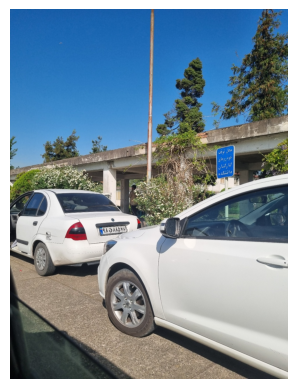

In [ ]:
# checking an image
img = cv2.imread('1000-YoloDataset/images/20240425_082830.JPG')
plt.imshow(img[...,::-1]); plt.axis('off')

In [ ]:
# checking its corresponding label
with open('1000-YoloDataset/labels/20240425_082830.txt', 'r') as file:
    line = file.readline()
    numbers = [float(num) for num in line.split()]
    coords = np.array(numbers)
    print(coords)

[0.         0.37083333 0.597      0.09966667 0.0265     0.32233333
 0.59025    0.41333333 0.585      0.41866667 0.60125    0.32733333
 0.609     ]


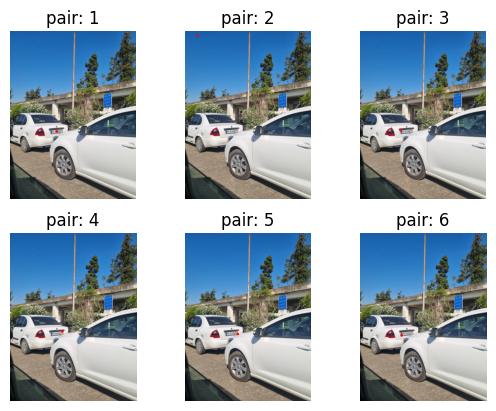

In [ ]:
# drawing circles of coords spots on the image
# in order to see what coord is related to what spot

height = 1280
width = 960

for i,j in enumerate(range(1,13,2)):
  # print(i)
  img2 = img.copy()
  w_ratio = coords[j]
  h_ratio = coords[j+1]
  center = (int(w_ratio*width), int(h_ratio*height))
  cv2.circle(img2, center, 10, (0,0,255), -1)
  plt.subplot(2,3,i+1);plt.imshow(img2[...,::-1]); plt.axis('off');  plt.title(f'pair: {i+1}')

we don't need the first and second pair for getting the surrounding quadrilateral of the plate.  
by the way, pair 1 is the plate center, and pair 2 is the height and width of the plate center (not a point coord).

___

### Applying perspectinve transform on the plate
So that we can check if transformation is feasable, then apply it for the next task which is plate recognition

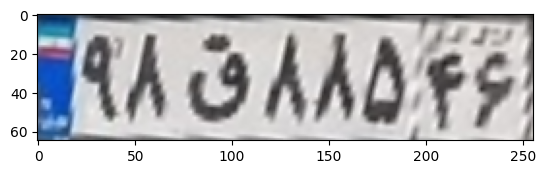

In [ ]:
# Perspective transformation


img2 = img.copy()

# saving important coords for perspective transformation
x = []
y =[]

for i,j in enumerate(range(1,13,2)):
  x.append(coords[j])
  y.append(coords[j+1])

height = 1280
width = 960

x = np.array(x)*width
y = np.array(y)*height


# performing perspective transform

plate_corners = np.float32([
    [x[2], y[2]],  # Top-left
    [x[3], y[3]],  # Top-right
    [x[4], y[4]],  # Bottom-right
    [x[5], y[5]]   # Bottom-left
])

dst_points = np.float32([
    [0, 0],           # Top-left
    [256 - 1, 0],     # Top-right
    [256 - 1, 65 - 1], # Bottom-right
    [0, 65 - 1]       # Bottom-left
])

M = cv2.getPerspectiveTransform(plate_corners, dst_points)

# apply the perspective transformation
transformed_plate = cv2.warpPerspective(img2, M, (256, 65))
plt.imshow(transformed_plate[...,::-1])

Yes! we can do.

___

### Playing around the augmented dataset
##### Downloading an augmented version of the dataset, from roboflow

In [ ]:
# from roboflow import Roboflow

# ROBOFLOW_API_KEY = "rf_32S0eOkYgZgxTpzbuxCmDHtOUhY2"

# # Initialize Roboflow
# rf = Roboflow(api_key='rf_32S0eOkYgZgxTpzbuxCmDHtOUhY2')

# # Select your workspace and project
# project = rf.workspace("workspace_name").project("project_name")

# # Select the dataset version
# version = project.version("version_number")

# # Download the dataset in YOLOv5 format
# dataset = version.download("yolov5")

In [ ]:
!gdown 17BTOFOWXT8ZU1W_ou3wD35c2keD5kKi5

Downloading...
From (original): https://drive.google.com/uc?id=17BTOFOWXT8ZU1W_ou3wD35c2keD5kKi5
From (redirected): https://drive.google.com/uc?id=17BTOFOWXT8ZU1W_ou3wD35c2keD5kKi5&confirm=t&uuid=66f947b8-ffd4-4ca8-90b0-057f7db952f5
To: /content/license_plate_detection.augmented_dataset.yolov8.zip
100% 247M/247M [00:05<00:00, 43.4MB/s]


In [ ]:
!unzip -qq license_plate_detection.augmented_dataset.yolov8.zip -d augmented_dataset

In [ ]:
!mkdir datasets
!mv augmented_dataset datasets

[          0     0.41437     0.58626     0.33159     0.59025     0.33401     0.60798     0.41823     0.60255     0.41437     0.58626]


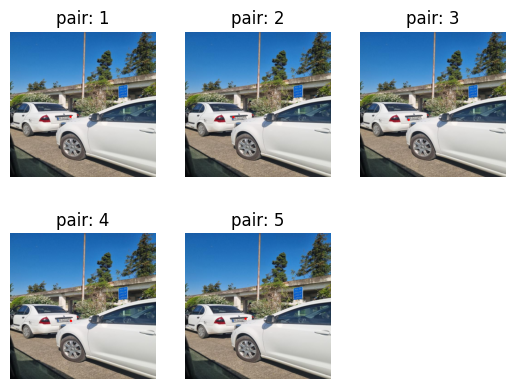

In [ ]:
import cv2
img = cv2.imread('/content/datasets/augmented_dataset/train/images/20240425_082830_JPG.rf.42b70da54280dd4afe181518f9997757.jpg')
img2 = img.copy()
# checking its corresponding label
with open('/content/datasets/augmented_dataset/train/labels/20240425_082830_JPG.rf.42b70da54280dd4afe181518f9997757.txt', 'r') as file:
    line = file.readline()
    numbers = [float(num) for num in line.split()]
    coords = np.array(numbers)
    print(coords)

height = 640
width = 640

for i,j in enumerate(range(1,10,2)):
  # print(i)
  img2 = img.copy()
  w_ratio = coords[j]
  h_ratio = coords[j+1]
  center = (int(w_ratio*width), int(h_ratio*height))
  cv2.circle(img2, center, 5, (0,0,255), -1)
  plt.subplot(2,3,i+1);plt.imshow(img2[...,::-1]); plt.axis('off');  plt.title(f'pair: {i+1}')

The first and the last points are the same ... why? useless

___

### Training a Yolov8n model on the augmented dataset

In [ ]:
from ultralytics import YOLO

# Load a pre-trained YOLO model
model = YOLO('yolov8n.pt')

# Train the model on your custom dataset
results = model.train(data='datasets/augmented_dataset/data.yaml', epochs=100)

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=datasets/augmented_dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True

100%|██████████| 755k/755k [00:00<00:00, 23.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 81.4MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/augmented_dataset/train/labels... 2394 images, 1 backgrounds, 0 corrupt: 100%|██████████| 2394/2394 [00:05<00:00, 454.13it/s]

train: New cache created: /content/datasets/augmented_dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/datasets/augmented_dataset/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 328.23it/s]

val: New cache created: /content/datasets/augmented_dataset/valid/labels.cache


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.05G      1.521      2.655      1.179         24        640: 100%|██████████| 150/150 [00:49<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.67it/s]

                   all        100        115      0.929      0.939      0.969      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.02G      1.235      1.311      1.029          8        640: 100%|██████████| 150/150 [00:47<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all        100        115      0.966      0.986      0.992       0.73



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.01G      1.163     0.9848      1.012         16        640: 100%|██████████| 150/150 [00:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        100        115      0.956      0.948      0.979       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.99G      1.121     0.8376     0.9852         20        640: 100%|██████████| 150/150 [00:45<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.42it/s]

                   all        100        115      0.956      0.938      0.975      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.02G      1.066     0.7554     0.9673         19        640: 100%|██████████| 150/150 [00:45<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.61it/s]

                   all        100        115      0.953      0.974       0.99      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         2G     0.9896     0.6966     0.9464         10        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        100        115      0.947      0.974      0.988      0.794



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.03G      1.018     0.6829     0.9516         13        640: 100%|██████████| 150/150 [00:45<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.38it/s]

                   all        100        115      0.981      0.957       0.99      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.99G     0.9831     0.6551     0.9382         31        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.93it/s]

                   all        100        115      0.958       0.98      0.992      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.02G     0.9542     0.6446     0.9367         15        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.61it/s]

                   all        100        115      0.955      0.991      0.991      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.99G     0.9188     0.6231     0.9274         20        640: 100%|██████████| 150/150 [00:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        100        115      0.951      0.974       0.99      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.03G     0.9221     0.6059     0.9311          8        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        100        115      0.972      0.974      0.989      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.99G     0.9292     0.6081     0.9235         15        640: 100%|██████████| 150/150 [00:51<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]

                   all        100        115      0.955      0.974      0.989      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.02G      0.894     0.5839     0.9212         15        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        100        115      0.965      0.963       0.99      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.99G     0.8989      0.588     0.9206         16        640: 100%|██████████| 150/150 [00:46<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.46it/s]

                   all        100        115      0.973      0.983       0.99      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.02G     0.8656     0.5693     0.9093         21        640: 100%|██████████| 150/150 [00:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.99it/s]

                   all        100        115      0.947      0.957      0.989      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.99G     0.8571     0.5584     0.9108         23        640: 100%|██████████| 150/150 [00:44<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        115      0.972      0.983      0.994      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.02G     0.8462     0.5452     0.9057         18        640: 100%|██████████| 150/150 [00:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.90it/s]

                   all        100        115      0.963      0.991      0.993      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.99G      0.819     0.5413     0.9001          8        640: 100%|██████████| 150/150 [00:45<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        100        115      0.963      0.983      0.987      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.02G     0.8416     0.5341     0.9035          9        640: 100%|██████████| 150/150 [00:44<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.82it/s]

                   all        100        115       0.96      0.983      0.992      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.99G     0.8192      0.527     0.8921         22        640: 100%|██████████| 150/150 [00:45<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        100        115      0.962          1      0.991       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.02G     0.8334     0.5191     0.9003         15        640: 100%|██████████| 150/150 [00:44<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        100        115      0.956          1      0.993      0.888



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.99G     0.8063     0.5196     0.8925         15        640: 100%|██████████| 150/150 [00:43<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        100        115      0.948      0.991      0.987      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.02G     0.8147      0.516     0.8957         21        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.29it/s]

                   all        100        115      0.958      0.989      0.991      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.99G     0.7932     0.5085     0.8937         23        640: 100%|██████████| 150/150 [00:44<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]

                   all        100        115      0.966       0.99      0.991      0.884



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.02G     0.7764     0.4978     0.8932         21        640: 100%|██████████| 150/150 [00:45<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.35it/s]

                   all        100        115      0.985      0.974      0.994      0.883



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.99G     0.7855      0.487     0.8834         13        640: 100%|██████████| 150/150 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.88it/s]

                   all        100        115      0.965      0.971      0.991      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.02G     0.7871     0.4882     0.8863         16        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.50it/s]

                   all        100        115       0.95      0.999      0.991      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.99G     0.7688     0.4948     0.8858         14        640: 100%|██████████| 150/150 [00:46<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.76it/s]

                   all        100        115      0.966      0.979      0.991       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.02G     0.7825     0.4889     0.8868         18        640: 100%|██████████| 150/150 [00:46<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        100        115       0.95      0.998      0.992      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.99G     0.7569     0.4767     0.8769         15        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.87it/s]

                   all        100        115       0.96      0.991      0.992      0.892



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.03G      0.769     0.4808     0.8793         18        640: 100%|██████████| 150/150 [00:47<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]

                   all        100        115      0.965      0.983      0.993      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         2G      0.753      0.479     0.8798         12        640: 100%|██████████| 150/150 [00:46<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.93it/s]

                   all        100        115      0.957      0.991      0.993      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.03G     0.7524     0.4671     0.8746         14        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        100        115      0.974      0.972      0.994      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.99G     0.7381     0.4618     0.8748         16        640: 100%|██████████| 150/150 [00:45<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        100        115       0.97      0.983       0.99      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.02G     0.7307     0.4588     0.8738         20        640: 100%|██████████| 150/150 [00:52<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.84it/s]

                   all        100        115      0.974      0.972      0.991      0.885



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.99G     0.7241     0.4604     0.8728         19        640: 100%|██████████| 150/150 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.34it/s]

                   all        100        115      0.957      0.976      0.992      0.889



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.02G     0.7225     0.4445     0.8691         17        640: 100%|██████████| 150/150 [00:43<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all        100        115      0.954          1      0.992      0.891



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.99G     0.7212      0.447      0.871         17        640: 100%|██████████| 150/150 [00:44<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]

                   all        100        115      0.957          1      0.988      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.02G     0.7167     0.4342     0.8743         23        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.86it/s]

                   all        100        115      0.958      0.998      0.991        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.99G     0.7294     0.4489     0.8751         17        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        100        115      0.954          1      0.991      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.03G     0.7152     0.4369     0.8702         16        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]

                   all        100        115      0.966          1      0.992      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.99G     0.7074     0.4355     0.8653         23        640: 100%|██████████| 150/150 [00:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        100        115      0.983      0.981       0.99      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.02G     0.7194     0.4403     0.8711         14        640: 100%|██████████| 150/150 [00:43<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]

                   all        100        115      0.957          1      0.992        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         2G     0.6977      0.421     0.8677         18        640: 100%|██████████| 150/150 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        100        115      0.965          1       0.99      0.899



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.03G     0.7028     0.4284      0.866         12        640: 100%|██████████| 150/150 [00:44<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all        100        115      0.958      0.989      0.992      0.904



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         2G     0.6954     0.4243     0.8704         14        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.82it/s]

                   all        100        115      0.974      0.988      0.992      0.893



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      2.03G     0.6834     0.4191     0.8677         14        640: 100%|██████████| 150/150 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        100        115      0.964          1      0.993      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         2G     0.6928     0.4159     0.8633         12        640: 100%|██████████| 150/150 [00:44<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.63it/s]

                   all        100        115      0.981          1      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.02G     0.6683     0.4008     0.8575         18        640: 100%|██████████| 150/150 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.02it/s]

                   all        100        115      0.975      0.998      0.993      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      1.99G     0.6654     0.4036      0.857         16        640: 100%|██████████| 150/150 [00:44<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        100        115      0.981      0.983      0.994      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.02G     0.6774      0.402     0.8571         27        640: 100%|██████████| 150/150 [00:43<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.49it/s]

                   all        100        115      0.974      0.983       0.99      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      1.99G     0.6774     0.4097     0.8624         20        640: 100%|██████████| 150/150 [00:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        115      0.974      0.981       0.99      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      2.03G     0.6613     0.4064     0.8563         14        640: 100%|██████████| 150/150 [00:43<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]

                   all        100        115      0.966          1       0.99       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         2G      0.662     0.4058     0.8598         12        640: 100%|██████████| 150/150 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.39it/s]

                   all        100        115      0.966          1      0.992      0.915



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.02G     0.6543     0.3946     0.8538         29        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        100        115      0.972      0.983      0.992      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      1.99G     0.6456     0.3907     0.8531         10        640: 100%|██████████| 150/150 [00:44<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.96it/s]

                   all        100        115      0.975      0.991      0.993      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.02G     0.6487     0.3911     0.8497          8        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]

                   all        100        115      0.966      0.999      0.993      0.922



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         2G     0.6362     0.3861     0.8542         16        640: 100%|██████████| 150/150 [00:43<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        100        115      0.974      0.984      0.993      0.918



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.02G      0.646     0.3927     0.8522         10        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

                   all        100        115      0.983      0.992      0.992       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      1.99G      0.655     0.3852     0.8577         18        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.42it/s]

                   all        100        115      0.974      0.984      0.991      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.02G     0.6404     0.3839     0.8523         19        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]

                   all        100        115      0.983       0.99      0.992      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      1.99G     0.6471     0.3879     0.8509         19        640: 100%|██████████| 150/150 [00:45<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all        100        115      0.975      0.998      0.994      0.919



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.02G     0.6471     0.3971     0.8495         16        640: 100%|██████████| 150/150 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.27it/s]

                   all        100        115       0.97          1      0.992      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      1.99G     0.6315     0.3791     0.8439         18        640: 100%|██████████| 150/150 [00:44<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        100        115      0.982      0.983      0.993      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.03G     0.6284      0.372      0.846         14        640: 100%|██████████| 150/150 [00:59<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.53it/s]

                   all        100        115      0.974       0.99      0.994      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      1.99G     0.6134     0.3681     0.8467         16        640: 100%|██████████| 150/150 [00:45<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.69it/s]

                   all        100        115      0.965          1      0.993      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      2.03G     0.6168      0.374     0.8465         13        640: 100%|██████████| 150/150 [00:48<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

                   all        100        115      0.983      0.986      0.994      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         2G     0.6293     0.3722     0.8491         11        640: 100%|██████████| 150/150 [00:48<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        100        115      0.958      0.998      0.993      0.909



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.04G     0.6159     0.3661     0.8467         17        640: 100%|██████████| 150/150 [00:52<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.50it/s]

                   all        100        115      0.966      0.999      0.992      0.907



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      1.99G      0.607     0.3563     0.8448         23        640: 100%|██████████| 150/150 [00:46<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.20it/s]

                   all        100        115      0.966          1      0.994      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.02G     0.6022      0.359     0.8407         17        640: 100%|██████████| 150/150 [00:43<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        100        115      0.973          1      0.992      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         2G     0.6019     0.3522     0.8457         12        640: 100%|██████████| 150/150 [00:45<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.44it/s]

                   all        100        115      0.973      0.991      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      2.02G     0.5981     0.3566     0.8467         21        640: 100%|██████████| 150/150 [00:44<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.95it/s]

                   all        100        115      0.983      0.982      0.994      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      1.99G      0.602     0.3603     0.8426         21        640: 100%|██████████| 150/150 [00:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        100        115      0.982      0.983      0.994      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.02G     0.5919     0.3491     0.8372         15        640: 100%|██████████| 150/150 [00:45<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.47it/s]

                   all        100        115      0.983      0.981      0.994      0.948



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      1.99G     0.6023     0.3532     0.8439         14        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        100        115      0.983      0.981      0.993      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.02G     0.5801     0.3488     0.8376         15        640: 100%|██████████| 150/150 [00:43<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]

                   all        100        115      0.974      0.991      0.993      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      1.99G     0.5864     0.3472     0.8379         19        640: 100%|██████████| 150/150 [00:45<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.43it/s]

                   all        100        115      0.975      0.999      0.993      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.02G     0.5844     0.3428     0.8396         20        640: 100%|██████████| 150/150 [00:44<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        100        115      0.975      0.983      0.994      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      1.99G     0.5773     0.3466     0.8392         25        640: 100%|██████████| 150/150 [00:44<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        100        115      0.965          1       0.99      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.02G     0.5712     0.3384     0.8361         22        640: 100%|██████████| 150/150 [00:44<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]

                   all        100        115      0.975          1      0.993      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      1.99G     0.5694      0.336     0.8357         17        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        100        115      0.956          1      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.02G     0.5696     0.3332     0.8388         17        640: 100%|██████████| 150/150 [00:43<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]

                   all        100        115      0.974      0.991      0.993      0.938



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         2G     0.5621     0.3355     0.8384         13        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.06it/s]

                   all        100        115      0.974          1      0.993      0.941



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.02G     0.5687     0.3346     0.8395         17        640: 100%|██████████| 150/150 [00:44<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all        100        115      0.973          1      0.992      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      1.99G     0.5628      0.326     0.8359         13        640: 100%|██████████| 150/150 [00:43<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        100        115      0.974          1      0.992      0.949



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      2.02G     0.5774     0.3355     0.8385         17        640: 100%|██████████| 150/150 [00:44<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]

                   all        100        115      0.974      0.997      0.993      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      1.99G     0.5413     0.3197     0.8278         16        640: 100%|██████████| 150/150 [00:44<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.09it/s]

                   all        100        115      0.975      0.997      0.993      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      2.03G     0.5523     0.3228      0.832         14        640: 100%|██████████| 150/150 [00:43<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.31it/s]

                   all        100        115      0.973          1      0.993      0.947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      1.99G     0.5438     0.3158     0.8315         25        640: 100%|██████████| 150/150 [00:45<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        100        115      0.983      0.981      0.993      0.943


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      2.02G     0.5138     0.2998     0.8301         12        640: 100%|██████████| 150/150 [00:42<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.83it/s]

                   all        100        115      0.964          1      0.993      0.942



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         2G     0.5036     0.2966     0.8279         13        640: 100%|██████████| 150/150 [00:41<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.45it/s]

                   all        100        115      0.971      0.991      0.994      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      2.02G      0.504     0.2942     0.8282         12        640: 100%|██████████| 150/150 [00:40<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.81it/s]

                   all        100        115      0.973          1      0.993      0.944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      1.99G     0.4916     0.2886     0.8182         11        640: 100%|██████████| 150/150 [00:40<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        100        115      0.983      0.982      0.993      0.946



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      2.02G     0.4872     0.2836     0.8231         11        640: 100%|██████████| 150/150 [00:40<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.51it/s]

                   all        100        115      0.971          1      0.993      0.943



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      1.99G     0.4874     0.2871     0.8227         10        640: 100%|██████████| 150/150 [00:40<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.60it/s]

                   all        100        115      0.974      0.996      0.993      0.945



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      2.02G     0.4856     0.2891      0.826         10        640: 100%|██████████| 150/150 [00:40<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.24it/s]

                   all        100        115      0.973      0.991      0.993      0.951



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      1.99G     0.4801     0.2782     0.8181         11        640: 100%|██████████| 150/150 [00:40<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.57it/s]

                   all        100        115      0.966          1      0.993       0.94



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      2.02G     0.4728     0.2762     0.8179         11        640: 100%|██████████| 150/150 [00:40<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.75it/s]

                   all        100        115      0.974      0.991      0.993      0.952



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         2G     0.4792     0.2835     0.8148         11        640: 100%|██████████| 150/150 [00:40<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        100        115      0.974      0.991      0.993      0.946



100 epochs completed in 1.310 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 6.3MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]


                   all        100        115      0.974      0.991      0.993      0.953
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 4.5ms postprocess per image
Results saved to runs/detect/train3


___

### Evaluating on test set

In [ ]:
from ultralytics import YOLO

# Load your trained model
# model = YOLO('runs/detect/train3/weights/best.pt')
model = YOLO('best.pt')


# Evaluate the model on the test dataset
# Ensure your data.yaml points to the test set
results = model.val(data='datasets/augmented_dataset/data.yaml')

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 14.4MB/s]
val: Scanning /content/datasets/augmented_dataset/valid/labels... 100 images, 0 backgrounds, 0 corrupt: 100%|██████████| 100/100 [00:00<00:00, 851.04it/s]

val: New cache created: /content/datasets/augmented_dataset/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:41<00:00,  5.92s/it]


                   all        100        115      0.974      0.991      0.993      0.958
Speed: 15.2ms preprocess, 381.0ms inference, 0.0ms loss, 1.2ms postprocess per image
Results saved to runs/detect/val2


### Evaluating on a single image

In [ ]:
# Load the trained model
# model = YOLO('runs/detect/train3/weights/best.pt')
model = YOLO('best.pt')

image_path = 'datasets/augmented_dataset/test/images/20240425_093250_JPG.rf.be830cf901476bff2f311c72d6c7a087.jpg'

# Perform detection on an image
results = model(image_path)
print(results)


image 1/1 /content/datasets/augmented_dataset/test/images/20240425_093250_JPG.rf.be830cf901476bff2f311c72d6c7a087.jpg: 640x640 2 license_plates, 311.1ms
Speed: 5.6ms preprocess, 311.1ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'license_plate'}
obb: None
orig_img: array([[[174, 114,  62],
        [174, 114,  62],
        [174, 114,  62],
        ...,
        [208, 241, 255],
        [201, 235, 251],
        [209, 243, 255]],

       [[175, 115,  63],
        [175, 115,  63],
        [176, 116,  64],
        ...,
        [206, 239, 255],
        [202, 236, 252],
        [208, 242, 255]],

       [[177, 117,  65],
        [177, 117,  65],
        [177, 117,  65],
        ...,
        [201, 234, 253],
        [203, 237, 253],
        [207, 241, 255]],

       ...,

       [[124, 126, 136],
        [116, 118, 128],
      

In [ ]:
for result in results:
    for box in result.boxes:
        print(box.xyxy)

tensor([[124.5612, 446.7733, 217.1413, 471.4529]])
tensor([[384.4081, 411.5492, 432.3365, 425.0137]])


In [ ]:
for result in results:
    for box in result.boxes:
        xyxy = box.xyxy
        for coord in xyxy:
            x1, y1, x2, y2 = coord
            print(f"Box Coordinates: ({x1}, {y1}) to ({x2}, {y2})")

Box Coordinates: (124.56121826171875, 446.77325439453125) to (217.14129638671875, 471.45294189453125)
Box Coordinates: (384.40814208984375, 411.5491943359375) to (432.33648681640625, 425.013671875)


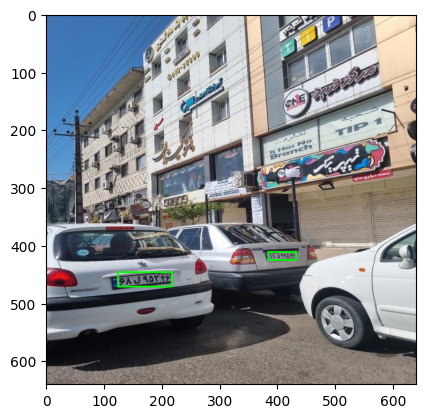

In [ ]:
# Load the image from the test directory
img_path = 'datasets/augmented_dataset/test/images/20240425_093250_JPG.rf.be830cf901476bff2f311c72d6c7a087.jpg'
img = cv2.imread(img_path)
img2 = img.copy()


for result in results:
    for box in result.boxes:
        xyxy = box.xyxy
        for coord in xyxy:
            x1, y1, x2, y2 = coord
            cv2.rectangle(img2, (int(x1), int(y1)), (int(x2), int(y2)), (0, 255, 0), 2)

plt.imshow(img2[...,::-1])

we are not going to use this model by the way, as it only returns bounding box, not keypoints.

___

#### Also using a model trained in roboflow, which roughly gives the same results

In [ ]:
!pip install inference_sdk --quiet

In [ ]:
# from inference_sdk import InferenceHTTPClient

# # create an inference client
# CLIENT = InferenceHTTPClient(
#     api_url="https://detect.roboflow.com",
#     api_key="rf_32S0eOkYgZgxTpzbuxCmDHtOUhY2"
# )

# # run inference on a local image
# print(CLIENT.infer(
#     "11B39235_15685.jpg",
#     model_id="license-plate-detection-xpwm7-p1v85/1"
# ))

____

### Problem statement

As can be seen, the problem with these trianed models (yolov8n), is that they do not retrun any keypoints so that we could apply a perspective transform (they only return bounding box info).  
So, we need to modify the yaml file and specify keypoints, and then use a yolov8n-pose model.
that is how we will be able to use keypoints for perspective transformation.  
This is done in the second notebook:  
`2-Training-a-Model-for-Plate-Keypoints-Detection`